In [1]:
import pickle
from keras.models import load_model
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from keras.utils import np_utils


In [2]:
trainX, testX, trainY, testY = pickle.load(open("dataBotNetMLP.pkl", "rb"))

In [3]:
model = load_model("MLPv1.h5")

In [4]:
predY = model.predict(trainX)

In [5]:
temp1 = np.argmax(predY, axis=1).reshape(-1,1)

In [6]:
temp2 = trainY.values.reshape(-1,1)

In [7]:
print(confusion_matrix(temp2, temp1))

[[ 16731   7693      4   4106]
 [  5708 113171      8  10512]
 [     0     93   4229      0]
 [     5   2669      0  20915]]


In [8]:
print(classification_report(temp2, temp1))

              precision    recall  f1-score   support

           0       0.75      0.59      0.66     28534
           1       0.92      0.87      0.89    129399
           2       1.00      0.98      0.99      4322
           3       0.59      0.89      0.71     23589

    accuracy                           0.83    185844
   macro avg       0.81      0.83      0.81    185844
weighted avg       0.85      0.83      0.84    185844



In [9]:
np.unique(temp2, return_counts=True)

(array([0, 1, 2, 3]), array([ 28534, 129399,   4322,  23589]))

In [10]:
predY.shape

(185844, 4)

In [12]:
label = ['Virut', 'Neris', 'Murlo', 'Rbot']

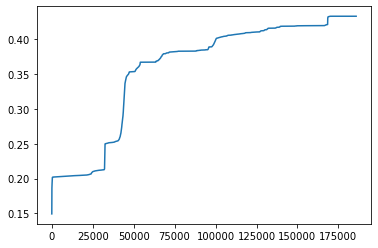

In [11]:
# y_pre=model.predict(X_train)
import matplotlib.pyplot as plt
stdTrain=np.std(predY,axis=1)
plt.plot(np.arange(len(stdTrain)),sorted(stdTrain))
plt.show()

In [13]:
threshold = 1 - 0.85
thresholdStd=sorted(stdTrain)[int(threshold*len(stdTrain))]
thresholdStd

0.21156777

In [19]:
def convertlabel(y):
    labelY = []
    for i in y:
        if i == 0: labelY.append("Virut")
        elif i == 1: labelY.append("Neris")
        elif i == 2: labelY.append("Murlo")
        else: labelY.append("Rbot")
    return labelY

In [20]:
labelY = convertlabel(np.argmax(predY,axis=1))

In [22]:
np.unique(np.argmax(predY,axis=1), return_counts=True)

(array([0, 1, 2, 3]), array([ 22444, 123626,   4241,  35533]))

In [23]:
np.unique(labelY, return_counts=True)

(array(['Murlo', 'Neris', 'Rbot', 'Virut'], dtype='<U5'),
 array([  4241, 123626,  35533,  22444]))

In [25]:
std = np.std(predY, axis=1)

In [26]:
std.shape

(185844,)

In [29]:
labelY = np.array(labelY)

In [31]:
labelY[std < thresholdStd] = "orther"

In [32]:
np.unique(labelY, return_counts=True)

(array(['Murlo', 'Neris', 'Rbot', 'Virut', 'orthe'], dtype='<U5'),
 array([  4241, 123292,   8001,  22434,  27876]))